In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('steam.csv')
df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


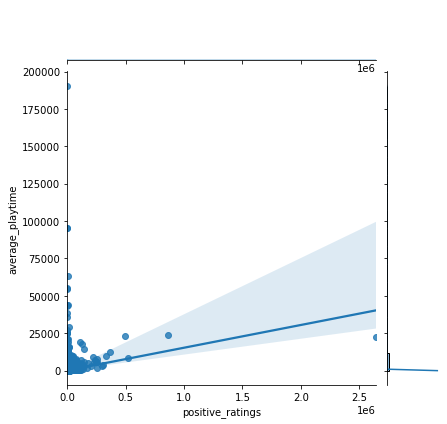

In [60]:
sns.jointplot(x='positive_ratings', y='average_playtime', 
              data=df, kind='reg')

Как видно большинство пользователей ставят положительную оценку на начальном этапе игры

In [139]:
top_developers_df = df.groupby('developer')[['positive_ratings']].sum()\
    .sort_values('positive_ratings', ascending=False).head(10)

top_developers_df.style.bar()

,positive_ratings
developer,
Valve;Hidden Path Entertainment,2644404
Valve,2253475
Facepunch Studios,584310
PUBG Corporation,496184
Bethesda Game Studios,472969
Ubisoft Montreal,362333
Rockstar North,330260
OVERKILL - a Starbreeze Studio.,308657
Smartly Dressed Games,292574


В магазине Steam наибольшую популярность имеют игры от Valve

<AxesSubplot:ylabel='platforms'>

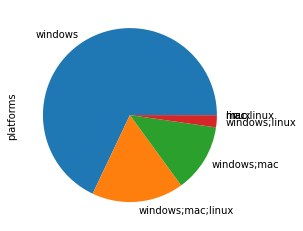

In [178]:
name_dynamics = df['platforms'].value_counts()
name_dynamics.plot(kind='pie', y='Count')

Как видно из круговой диаграммы, самая популярная платформа - Windows. А только для Linux систем игры почти не разарабатывают

## Boxplot

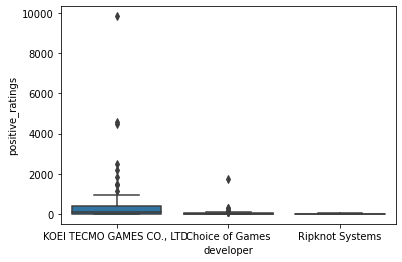

In [144]:
top_developer = df.developer.value_counts().sort_values(ascending=False).head(3).index.values
top_developer
ax = sns.boxplot(x="developer", y="positive_ratings", 
            data=df[df.developer.isin(top_developer)])


На данном графике мы видим топ 3 популярных компаний разработчиков (по кол-ву выпущенных продуктов) и позитивные отзывы на
их продукты.
Как видно кол-во позитивных отзывов на продукты этих компаний не самый высокий

Text(0, 0.5, 'games')

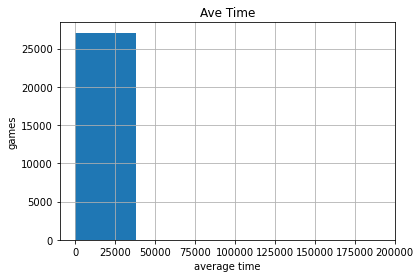

In [158]:
data = df.sort_values('average_playtime',ascending=False)
ax = data.average_playtime.hist(bins=5)
ax.set_title('Ave Time')
ax.set_xlabel('average time')
ax.set_ylabel('games')

??????????????????????????????

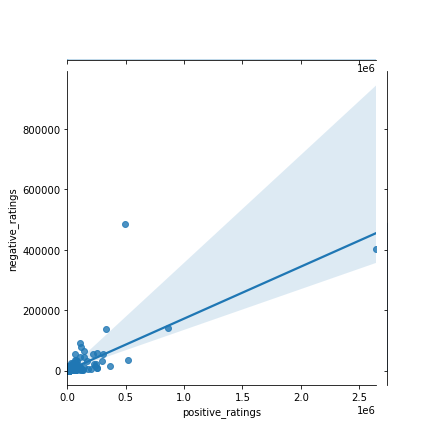

In [179]:
sns.jointplot(x='positive_ratings', y='negative_ratings', 
              data=df, kind='reg')

Что и следовало ожидать близких по значению негативных и позитивных отзывов - нет

## Heatmap

In [84]:
platform_genre_sales = df.pivot_table(
                        index='genres', 
                        columns='platforms', 
                        values='price', 
                        aggfunc=sum).fillna(0).applymap(float)

platform_genre_sales

platforms,linux,mac,mac;linux,windows,windows;linux,windows;mac,windows;mac;linux
genres,,,,,,,
Accounting;Animation & Modeling;Audio Production;Design & Illustration;Education;Photo Editing;Software Training;Utilities;Video Production;Web Publishing,0.0,0.00,0.0,11.39,0.00,0.00,0.00
Accounting;Education;Software Training;Utilities;Early Access,0.0,0.00,0.0,0.00,0.00,0.00,0.00
Action,0.0,15.49,0.0,7392.21,91.44,436.34,478.65
Action;Adventure,0.0,0.00,0.0,3770.17,28.98,324.43,321.51
Action;Adventure;Casual,0.0,0.00,0.0,243.85,0.00,18.85,29.33
...,...,...,...,...,...,...,...
Violent;Simulation;Early Access,0.0,0.00,0.0,4.79,0.00,0.00,0.00
Violent;Simulation;Sports,0.0,0.00,0.0,39.99,0.00,0.00,0.00
Violent;Sports,0.0,0.00,0.0,8.99,0.00,0.00,0.00


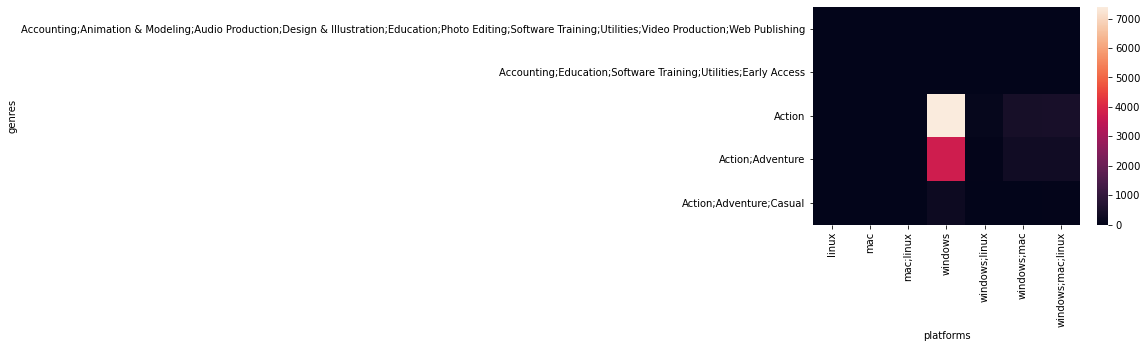

In [86]:
ax = sns.heatmap(platform_genre_sales.head(5))

В топ 5 самых дорогих игр в стиме все вышли на платформе Windows

## Scatter plot matrix

In [132]:
data= df.groupby('name')[['price','achievements', 'positive_ratings','average_playtime']].sum()\
     .sort_values('positive_ratings', ascending=False)

In [134]:
data.head()

,price,achievements,positive_ratings,average_playtime
name,,,,
Counter-Strike: Global Offensive,0.00,167,2644404,22494
Dota 2,0.00,0,863507,23944
Team Fortress 2,0.00,520,515879,8495
PLAYERUNKNOWN'S BATTLEGROUNDS,26.99,37,496184,22938
Garry's Mod,6.99,29,363721,12422


array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='achievements', ylabel='price'>,
        <AxesSubplot:xlabel='positive_ratings', ylabel='price'>,
        <AxesSubplot:xlabel='average_playtime', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='achievements'>,
        <AxesSubplot:xlabel='achievements', ylabel='achievements'>,
        <AxesSubplot:xlabel='positive_ratings', ylabel='achievements'>,
        <AxesSubplot:xlabel='average_playtime', ylabel='achievements'>],
       [<AxesSubplot:xlabel='price', ylabel='positive_ratings'>,
        <AxesSubplot:xlabel='achievements', ylabel='positive_ratings'>,
        <AxesSubplot:xlabel='positive_ratings', ylabel='positive_ratings'>,
        <AxesSubplot:xlabel='average_playtime', ylabel='positive_ratings'>],
       [<AxesSubplot:xlabel='price', ylabel='average_playtime'>,
        <AxesSubplot:xlabel='achievements', ylabel='average_playtime'>,
        <AxesSubplot:xlabel='positive_ratings', ylabe

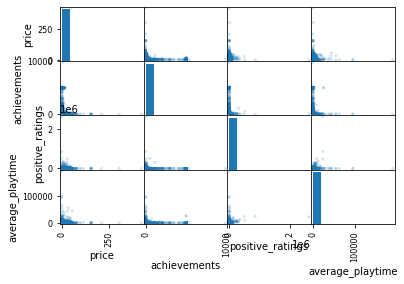

In [136]:
pd.plotting.scatter_matrix(data, alpha=0.2)

**Тоже самое через pairplot**

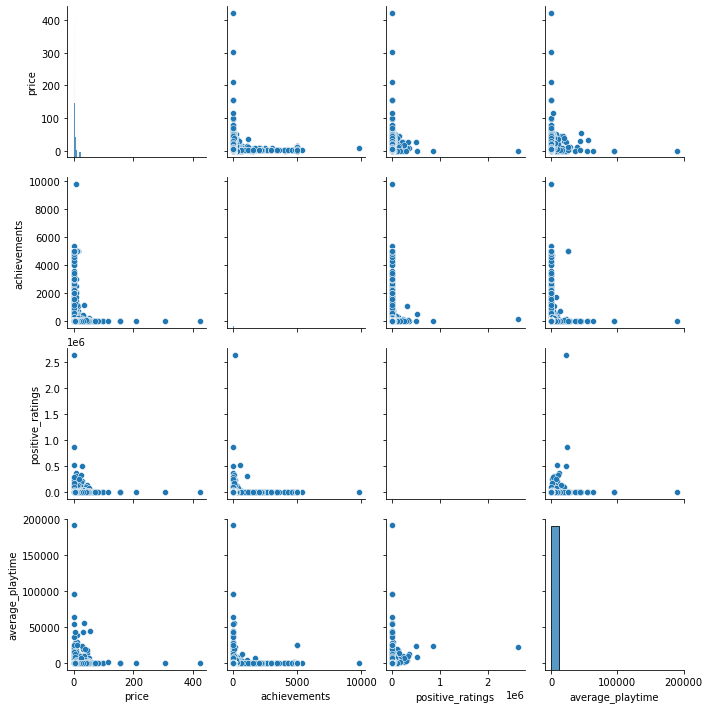

In [159]:
sns_plot = sns.pairplot(
    df[['price','achievements', 'positive_ratings','average_playtime']])
sns_plot

Игры с большим позитивным рейтингом имеют большее время игры, не зависимо от цены и кол-ва достижений